# Test Case

In order to understand a little better how to utilize unsupervised machine learning algorithms we will runa test case that comes from the final project presented by out TA Soyoung An and Yisurai Du for BMI 6018 Intro to Programming

The project title is: 
### Relationship between amount of 911 calls and characteristics of townships in Montgomery County in Pennsylvania

The main goal of the project is to try to understand the factors associated to 911 calls in the Montgomery Count in Pennsylvania.

There are 4 predictors included:

Levels of education (high - low)
employment (yes - no)
race (White - others)
income (quantitative)

The data that we will use is a set already collected and prepared. The data is also normalized by the population size for each township (total of 67 townships)

In [8]:
# install.packages("tidyverse")
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
# install.packages("factoextra")
library(factoextra)
library(dendextend)
# install.packages("psych")
library(psych)



In [9]:

calls = read.csv(file = "911calls.csv", row.names = 1, header = T)

head(calls,20)
calls[rownames(calls)=="NARBERTH",]
calls[rownames(calls)=="PHILADELPHIA",]

,twp,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NEW HANOVER,0.3173947,0.08200756,0.5102400,0.9141250,31053.83
1,HATFIELD,0.3133383,0.13338322,0.5547176,0.7253468,28370.42
2,NORRISTOWN,0.1514128,0.20512671,0.4893679,0.3495485,16071.42
3,LOWER POTTSGROVE,0.2815189,0.16429517,0.5020682,0.8520847,29904.47
4,LANSDALE,0.2783019,0.12987013,0.5162950,0.7228620,23601.85
5,HORSHAM,0.3520987,0.13312257,0.5294431,0.8570123,31351.98
6,SKIPPACK,0.3136637,0.07189917,0.3723861,0.7590948,29089.80
7,LOWER SALFORD,0.3520530,0.10682119,0.5274172,0.8874172,33902.91
8,PLYMOUTH,0.3418974,0.22905735,0.4994874,0.7840299,30087.95


twp,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


twp,rate_high_edu,rate_call_911,rate_emp,rate_Race_w,income
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


## First, let's see how correlated are the variables among each other and specially with 911 calls

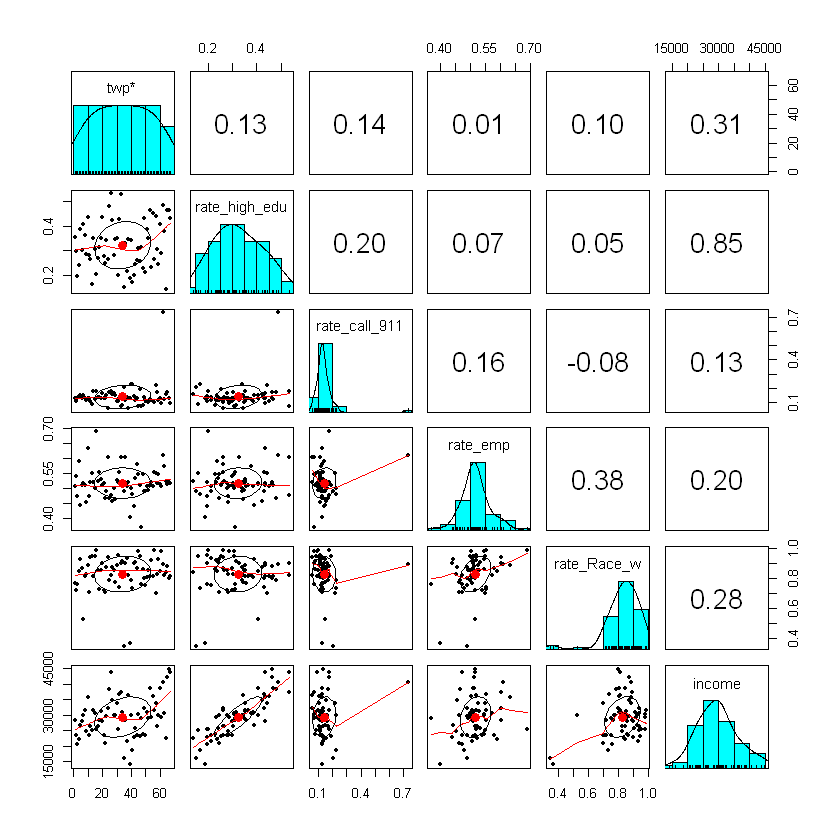

In [13]:
##These are two functions that give pair-wise correlation coefficients for every variable
# round(cor(calls),4)
pairs.panels(calls)

## Note that rate_call_911 is not strongly associated to any variable.

In [14]:
scaled_df = scale(calls)
distance_calls <- get_dist(scaled_df) #get_dist(): Computes a distance matrix between the rows of a data matrix.
fviz_dist(distance_calls, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))


ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric


## There seems to be strong clustering around some of the counties, maybe we shoud subset based on some parameter, lets do a PCA and see the distribution across the principal components.

Let's start by examining the data using a PCA to see if we can use PCs in order to minimize the number of dimensions.

In [15]:
####PCA###
apply(calls, 2, var)
scaled_df <- apply(calls, 2, scale)
head(scaled_df)
row.names(scaled_df) = row.names(calls)
glimpse(scaled_df)

Warning message in FUN(newX[, i], ...):
"NAs introduced by coercion"


twp rate_high_edu rate_call_911      rate_emp   rate_Race_w 
           NA  9.470309e-03  6.663719e-03  2.567472e-03  1.418990e-02 
       income 
 4.247190e+07

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric


In [16]:
round(cor(scaled_df),4)
pairs.panels(scaled_df)

ERROR: Error in is.data.frame(x): object 'scaled_df' not found


In [ ]:
##There is a clear outlier that is driving the distribution in the rate of employment variable
##Should we eliminate this outlier??


In [ ]:
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
str(arrests.eigen)

(phi <- arrests.eigen$vectors[,1:4])

phi <- -phi
row.names(phi) <- c("rate_high_edu", "rate_call_911", "rate_emp", "rate_Race_w", "income")
colnames(phi) <- c("PC1", "PC2","PC3","PC4")
phi

PC1 <- as.matrix(scaled_df) %*% phi[,1]
PC2 <- as.matrix(scaled_df) %*% phi[,2]
PC3 <- as.matrix(scaled_df) %*% phi[,3]
PC4 <- as.matrix(scaled_df) %*% phi[,4]

# Create data frame with Principal Components scores
PC <- data.frame(State = row.names(scaled_df), PC1, PC2, PC3, PC4)
head(PC)

ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_point() +
  #geom_text(aes(label = State), size = 3) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of USArrests Data")


## If you look at the loadings, we see that PC1 is dominated by rate_high_edu and income

In [ ]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

## PC1 explains 41% of the variation and PC2 25% we only need these two

In [ ]:
pca_result <- prcomp(scaled_df, scale = TRUE)
names(pca_result)

In [ ]:
pca_result$x <- - pca_result$x
head(pca_result$x)

biplot(pca_result, scale = 0, cex = 0.5)

## Let's use the k-means technique to split the counties based on similarities across variables

In [ ]:
###K-Means###

k3 <- kmeans(scaled_df, centers = 4, nstart = 100)
head(k3$cluster)
PC$Kmeans = k3$cluster
PC$Kmeans = as.factor(PC$Kmeans)
clusters_one = PC[PC$Kmeans == 1,] 
clusters_two = PC[PC$Kmeans == 2,] 
clusters_three = PC[PC$Kmeans == 3,] 
#clusters_four = PC[PC$Kmeans == 4,] 

table(PC$Kmeans)


## I split the data in 4 groups based on the overall variance of the dataset. The plot below is how the counties separate. Remember that PCA1 is highly driven by income and rate_high_education PC2 Is dominated by race and employment, so group 1 counties have lower income and more race diversity and group 4 have higher income and medium diversity, group 2 is the less diverse of medium income to low.

In [ ]:
ggplot(PC, aes(PC1, PC2,color = Kmeans)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_point() +
  #geom_text(aes(label = State), size = 3) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of 911 call rates Montgomery County Pennsylvania")

## Because income is the highest loading in PCA with -0.6468989, let's split the data with this variable in three groups and see if our correlations improve

In [ ]:
scaled_df_K = cbind(scaled_df,PC$Kmeans)
scaled_df_K = as.data.frame(scaled_df_K)

scaled_df_K[order(scaled_df_K$V6),]

low = scaled_df_K[scaled_df_K$V6==1,]
low = low[,1:5]
round(cor(low),4)
pairs.panels(low)


# wow look at those correlations, there is a lot more power in this subset as income and rate_high_edu are highly correlated to rate_911_calls. Another important piece of information is the sign of the correlation. Income is negatively correlated which means that the higher the income the less number of 911 calls, similar to rate_high_edu.

In [ ]:
high = scaled_df_K[scaled_df_K$V6==3,]
high = high[,1:5]
round(cor(high),4)
pairs.panels(high)

# things look very different to our higher income counties, there is no really correlations across variables and the rates of 9_11 calls as expected as there is not a strong separationg of race and income in this group.

In [ ]:
mid = scaled_df_K[scaled_df_K$V6==4,]
mid = mid[,1:5]
round(cor(mid),4)
pairs.panels(mid)

# There even less correlations here, there might be some other components that could be driving this group that we havent been able to detect.

## Finally, let's compare the k-means approach to the hierarchichal clustering approach

In [ ]:
##Hierarchical Clustering

# Dissimilarity matrix
d <- dist(scaled_df, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)

# We are using an euclidean distance and a complete linkage clustering algorith, we can see 3 or 4 clear clusters with some strong outliers.

In [ ]:
# methods to assess which is the best clustering method for this dataset
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(scaled_df, method = x)$ac
}

map_dbl(m, ac)

## The coefficients are very similar but it seems that the ward method might be better for this data. let's look

In [ ]:
hc3 <- agnes(scaled_df, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes") 

In [ ]:
pltree(hc3, cex = 0.6, hang = -1, main = "Dendrogram of agnes")
rect.hclust(hc3, k = 5)

# Three clear large clusters and two outliers that might be introducing noise to the data. You can cut the data with these groups and get the correlations plots and see if the signal improves.

### The plot below is a different representation of the clusters from k-means. 

In [ ]:
fviz_cluster(list(data = scaled_df_K, cluster = scaled_df_K$V6))

In [ ]:
fviz_nbclust(scaled_df, FUN = hcut, method = "wss")